## Import the necessary modules

In [1]:
#### Now since this is a new file we need to import other modules (YAY!) including our R' emulator

### and let's not forget the usual gang:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os 

In [2]:
### Obtain PPI Edge Data
PPI_Data_Unaltered_Edge = pd.read_csv('Resources/Output from Cytoscape/Unaltered_PPI_Export.csv')

output_path = 'Resources/Output from Cytoscape'
PPI_Data_Unaltered_Edge.head(10)



,interaction,name,selected,shared interaction,shared name,stringdb::coexpression,stringdb::cooccurrence,stringdb::databases,stringdb::experiments,stringdb::fusion,stringdb::interspecies,stringdb::neighborhood,stringdb::score,stringdb::textmining
0,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000287878,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000287878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523,0.523
1,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000355533,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000355533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828,0.828
2,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000358081,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000358081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.431,0.431
3,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000257189,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000257189,0.105,NaN,0.5,0.134,NaN,NaN,NaN,0.876,0.719
4,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000357283,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000357283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754,0.754
5,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000351022,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000351022,0.067,NaN,NaN,NaN,NaN,NaN,NaN,0.555,0.543
6,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000253083,False,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000253083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.432,0.433
7,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000314499,False,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000314499,NaN,NaN,NaN,0.051,NaN,NaN,NaN,0.405,0.399
8,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000321805,False,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000321805,0.200,NaN,NaN,0.069,NaN,NaN,NaN,0.562,0.460
9,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000479261,False,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000479261,0.052,NaN,NaN,0.346,NaN,NaN,NaN,0.862,0.796


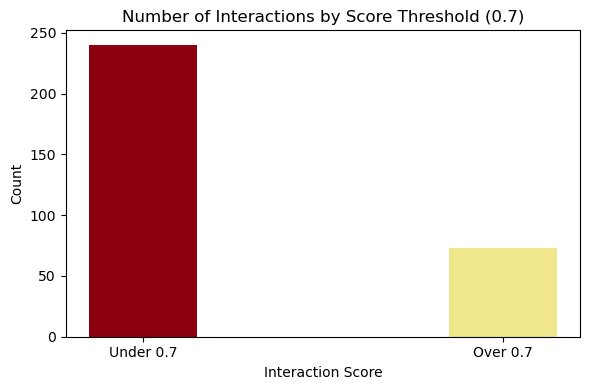

In [3]:
# Count interactions based on the threshold
threshold = 0.7
counts = {
    "Under 0.7": (PPI_Data_Unaltered_Edge['stringdb::score'] < threshold).sum(),
    "Over 0.7": (PPI_Data_Unaltered_Edge['stringdb::score'] >= threshold).sum(),
}

categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['#8C000F', '#F0E68C'], width =0.3)
plt.xlabel('Interaction Score')
plt.ylabel('Count')
plt.title('Number of Interactions by Score Threshold (0.7)')
plt.tight_layout()

output_path_png = 'Resources/Output from Cytoscape/Interactors_Score.png'
plt.savefig(output_path_png, dpi=300, bbox_inches='tight')

plt.show()


In [5]:
### Now let's eliminate any interaction under 0.7 that might not be significant
PPI_Data_Filtered = PPI_Data_Unaltered_Edge.drop(
    PPI_Data_Unaltered_Edge[PPI_Data_Unaltered_Edge['stringdb::score'] < 0.7].index
)
PPI_Data_Filtered_df = PPI_Data_Filtered 

PPI_Data_Filtered_df

,interaction,name,selected,shared interaction,shared name,stringdb::coexpression,stringdb::cooccurrence,stringdb::databases,stringdb::experiments,stringdb::fusion,stringdb::interspecies,stringdb::neighborhood,stringdb::score,stringdb::textmining
1,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000355533,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000355533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828,0.828
3,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000257189,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000257189,0.105,NaN,0.50,0.134,NaN,NaN,NaN,0.876,0.719
4,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000357283,False,pp,9606.ENSP00000070846 (pp) 9606.ENSP00000357283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754,0.754
9,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000479261,False,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000479261,0.052,NaN,NaN,0.346,NaN,NaN,NaN,0.862,0.796
11,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000236192,False,pp,9606.ENSP00000215095 (pp) 9606.ENSP00000236192,NaN,NaN,0.90,0.460,NaN,NaN,NaN,0.969,0.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,pp,9606.ENSP00000380888 (pp) 9606.ENSP00000417235,False,pp,9606.ENSP00000380888 (pp) 9606.ENSP00000417235,0.154,NaN,0.54,0.715,NaN,NaN,NaN,0.996,0.974
305,pp,9606.ENSP00000441929 (pp) 9606.ENSP00000495398,False,pp,9606.ENSP00000441929 (pp) 9606.ENSP00000495398,0.055,NaN,0.50,0.132,NaN,NaN,NaN,0.895,0.776
307,pp,9606.ENSP00000427018 (pp) 9606.ENSP00000479261,False,pp,9606.ENSP00000427018 (pp) 9606.ENSP00000479261,NaN,NaN,NaN,0.942,NaN,NaN,NaN,0.984,0.741
308,pp,9606.ENSP00000441929 (pp) 9606.ENSP00000484824,False,pp,9606.ENSP00000441929 (pp) 9606.ENSP00000484824,0.064,NaN,0.50,0.098,NaN,NaN,NaN,0.937,0.869


In [6]:
# Calculate the mean of 'stringdb::score'
mean_score = PPI_Data_Unaltered_Edge['stringdb::score'].mean()
print(f"Mean stringdb::score: {mean_score}")


Mean stringdb::score: 0.5808658146964856


In [7]:
summary_stats = PPI_Data_Unaltered_Edge['stringdb::score'].describe()
summary_df = summary_stats.reset_index()
summary_df.columns = ['Statistic', 'Value']
summary_df

,Statistic,Value
0,count,313.000000
1,mean,0.580866
2,std,0.174032
3,min,0.400000
4,25%,0.444000
5,50%,0.513000
6,75%,0.681000
7,max,0.999000


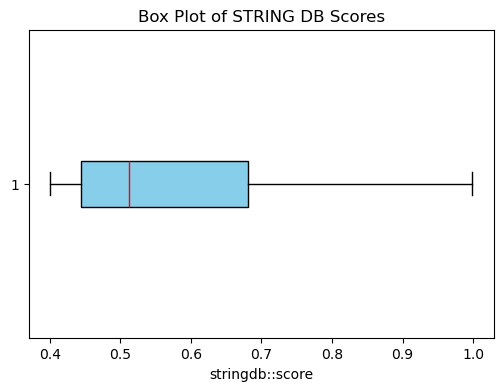

In [9]:
# Box plot for 'stringdb::score'
plt.figure(figsize=(6, 4))
plt.boxplot(PPI_Data_Unaltered_Edge['stringdb::score'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#87CEEB', color='black'),  
            whiskerprops=dict(color='black'),  
            capprops=dict(color='black'), 
            medianprops=dict(color='red'))  

plt.xlabel('stringdb::score')
plt.title('Box Plot of STRING DB Scores')

# Save the figure (optional)
output_path_box = 'Resources/Output from Cytoscape/stringdb_score_boxplot.png'
plt.savefig(output_path_box, dpi=300, bbox_inches='tight')

plt.show()


In [10]:
### Obtain PPI Edge Data For Filtered CSV
PPI_Data_Filtered_Edge = pd.read_csv('Resources/Output from Cytoscape/Edge_0.7_Network.csv')

PPI_Data_Filtered_Edge.head(10)

summary_stats_filtered = PPI_Data_Filtered_Edge['stringdb::score'].describe()
summary_df_filt = summary_stats_filtered.reset_index()
summary_df_filt.columns = ['Statistic', 'Value']
summary_df_filt

,Statistic,Value
0,count,73.000000
1,mean,0.856041
2,std,0.102358
3,min,0.700000
4,25%,0.749000
5,50%,0.873000
6,75%,0.951000
7,max,0.999000


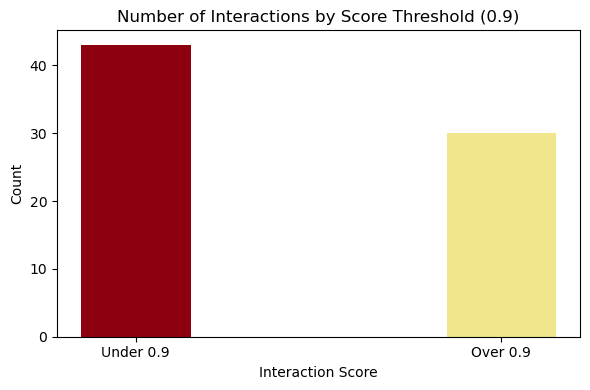

In [11]:
# Count interactions based on the threshold
threshold = 0.9
counts = {
    "Under 0.9": (PPI_Data_Filtered_Edge['stringdb::score'] < threshold).sum(),
    "Over 0.9": (PPI_Data_Filtered_Edge['stringdb::score'] >= threshold).sum(),
}

categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['#8C000F', '#F0E68C'], width =0.3)
plt.xlabel('Interaction Score')
plt.ylabel('Count')
plt.title('Number of Interactions by Score Threshold (0.9)')
plt.tight_layout()

output_path_png = 'Resources/Output from Cytoscape/Interactors_Score_0.9.png'
plt.savefig(output_path_png, dpi=300, bbox_inches='tight')

plt.show()


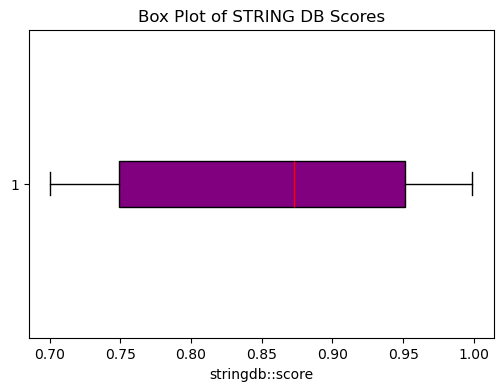

In [12]:
# Box plot for 'stringdb::score'
plt.figure(figsize=(6, 4))
plt.boxplot(PPI_Data_Filtered_Edge['stringdb::score'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='purple', color='black'),  
            whiskerprops=dict(color='black'),  
            capprops=dict(color='black'), 
            medianprops=dict(color='red'))  

plt.xlabel('stringdb::score')
plt.title('Box Plot of STRING DB Scores')

# Save the figure (optional)
output_path_box = 'Resources/Output from Cytoscape/stringdb_score_boxplot_filtered.png'
plt.savefig(output_path_box, dpi=300, bbox_inches='tight')

plt.show()
